# Project 7: Power Law Distributions: Zipf's Law
## Abstract
In this lab, we were meant to search for data for systems that can exhibit the Power law and curve fit them to get a relationship between the parameters of the data. I collected data for sizes of 200 cities and the population of these 200 cities in the United states, i graphed the log of rank of this cities in size against the log the city population and did a curve fit. I noticed that there is a linear relationship between the logs of these data parameters. This shows similar attributes to an observation that linguist George Zipf made about the relationship between rank and frequency in languages spoken around the world, he called this the rank vs. frequency rule. If this law is applied to the sizes of cities, we find out that the city with the largest population in any country is generally twice as large as the next-biggest, and so on. I did this with cities in the U.S where the biggest city in the U.S., New York, had a population of 8,622,357. Los Angeles, ranked number 2, had a population of 4,085,014. And the cities in the next three ranks, Illinois, Texas, and Arizona, clock in at 2,670,406, 2,378,146 and 1,743,469 respectively. One can see that the numbers aren't exact, but when looked at statistically, they are remarkably consistent with Zipf's predictions. I had a slope of -1.35 $\pm$ 0.01 and and intercept of 21.28 $\pm$ 0.08 when i fitted the data from the graph. The fact that the slope is very close to -1 means that Zipf's is truly a power law. I also got a correlation coefficient squared of about 0.996.
## Description
Zipf's law is an empirical law formulated using mathematical statistics that refers to the fact that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution, one of a family of related discrete power law probability distributions. Zipf distribution is related to the zeta distribution, but is not identical.

Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation.

The law is named after the American linguist George Kingsley Zipf, who popularized it and sought to explain it, though he did not claim to have originated it. The French stenographer Jean-Baptiste Estoup (1868–1950) appears to have noticed the regularity before Zipf.
## Algorithm and Description
To verify zipf's law as a power law, i imported population and rank data from a csv file. I plotted the log of the rank of these cities in size against the log of the population of these cities. I used the curve fitting function from the scientific computing library to try figure out a relationship between the logs. To verify zipf's law as a power law, we needed a linear fit with a slope close to -1.
## Implementation and Code

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
import sympy as sp
from scipy.optimize import curve_fit 
from scipy import stats
db = pd.read_csv('data1.csv')
db

,Rank,State,Population,Population Density
0,1,New York,8622357,11083.6609
1,2,California,4085014,3365.4175
2,3,Illinois,2670406,4535.2716
3,4,Texas,2378146,1442.5631
4,5,Arizona,1743469,1300.3778
...,...,...,...,...
195,196,Florida,137447,847.6251
196,197,California,136758,1409.1272
197,198,South Carolina,135629,388.0102
198,199,Texas,135443,1439.0369


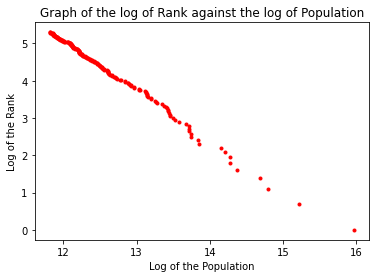

In [2]:
poplog = np.log(db.Population)
ranklog = np.log(db.Rank)
pl.title("Graph of the log of Rank against the log of Population")
pl.xlabel("Log of the Population")
pl.ylabel("Log of the Rank")
pl.plot(poplog, ranklog, 'r.')

Slope = -1.35 +/-  0.01
Intercept =     21.28 +/-      0.08


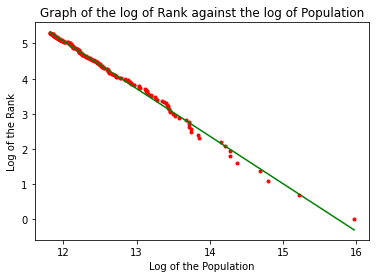

In [3]:
pl.plot(poplog, ranklog, 'r.')
def line(x, m, b):
    return (m * x)+ b
par, cov = curve_fit(line, poplog, ranklog)
m,b = par
dm, db = np.sqrt(np.diag(cov))

ibth = np.linspace(poplog.values[0], poplog.values[-1], 10)
icth = line(ibth, m, b)
pl.plot(ibth, icth, 'g-')
pl.title("Graph of the log of Rank against the log of Population")
pl.xlabel("Log of the Population")
pl.ylabel("Log of the Rank")
print("Slope = %5.2f +/- %5.2f" %(m,dm))
print("Intercept = %9.2f +/- %9.2f" %(b,db))

As expected we get a slope really close to -1. We can see that the linear line almost fit perfectly to the scattered data points. We can find the correlation coefficient squared which shows how close the data are to the fitted regression line.

In [5]:
def rsquared(poplog, ranklog):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(poplog, ranklog)
    return r_value**2
print ("R_squared value:", rsquared(poplog, ranklog))

R_squared value: 0.9958701561076587


We get an r-squared value of 0.996 which is really close to one. Which means the data fits to the regression line to a high degree.

## Conclusion
In this lab we wanted to try curve fit some type of power law data. I applied zipf's rank and frequency law to the relationship between size of cities and population. I collected data for the rank of cities in size and their population and i plotted their logs against each other. For this relationship to obey some power law it should be able to be fitted in some kind of linear relationship with a slope of -1. I fitted this data and had a slope of -1.35  $\pm$ 0.01 pretty much closed to what was expected. I aslo found the correlation coefficient to be about 0.996 which is close to 1 and it therefore siginifies a high level of correlation between data and the fit.